In [ ]:
!nvidia-smi
%mkdir content
%cd content

!git clone https://github.com/ultralytics/yolov5

%cd yolov5

%conda install pytorch torchvision torchaudio pytorch-cuda=12.4 -c pytorch -c nvidia
%pip install -r requirements.txt
%pip install roboflow

Tue Dec  3 04:03:55 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 566.14                 Driver Version: 566.14         CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4060 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   37C    P8              5W /   80W |     517MiB /   8188MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [1]:
import torch
from IPython.display import Image, clear_output  # to display images

# clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 2.5.1 _CudaDeviceProperties(name='NVIDIA GeForce RTX 4060 Laptop GPU', major=8, minor=9, total_memory=8187MB, multi_processor_count=24, uuid=4d7dbcfa-d6ab-87ae-955b-ec4345a02bc5, L2_cache_size=32MB)


In [3]:
%cd content/yolov5
from roboflow import Roboflow
rf = Roboflow(api_key="DHYGwhMN28Of2QfMR09R")
project = rf.workspace("sandy-2qr88").project("payload-finder")
version = project.version(1)
dataset = version.download("yolov5")

This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.


d:\Code\Robotik\DataTraining\content\yolov5
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Payload-Finder-1 in yolov5pytorch:: 100%|██████████| 416/416 [00:00<00:00, 1460.65it/s]


In [2]:
%%time
%cd content/yolov5
!python train.py \
  --img 202 \
  --batch 16 \
  --epochs 200 \
  --data Payload-Finder-1/data.yaml \
  --weights yolov5s.pt \
  --name yolov5s_results  \
  --cache \
  --device 0

d:\Code\Robotik\DataTraining\content\yolov5


c:\Users\Sandy\miniconda3\envs\mlenv\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


CPU times: total: 3.56 s
Wall time: 11min 28s


train: weights=yolov5s.pt, cfg=, data=Payload-Finder-1/data.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=200, batch_size=16, imgsz=202, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=yolov5s_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-388-g882c35fc Python-3.12.7 torch-2.5.1 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias

In [3]:
!python export.py --weights runs/train/yolov5s_results5/weights/best.pt --include onnx

export: data=D:\Code\Robotik\DataTraining\content\yolov5\data\coco128.yaml, weights=['runs/train/yolov5s_results5/weights/best.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, per_tensor=False, dynamic=False, cache=, simplify=False, mlmodel=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['onnx']
YOLOv5  v7.0-388-g882c35fc Python-3.12.7 torch-2.5.1 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs

PyTorch: starting from runs\train\yolov5s_results5\weights\best.pt with output shape (1, 25200, 6) (13.6 MB)

ONNX: starting export with onnx 1.17.0...
ONNX: export success  1.1s, saved as runs\train\yolov5s_results5\weights\best.onnx (27.2 MB)

Export complete (1.7s)
Results saved to D:\Code\Robotik\DataTraining\content\yolov5\runs\train\yolov5s_results5\weights
Detect:        

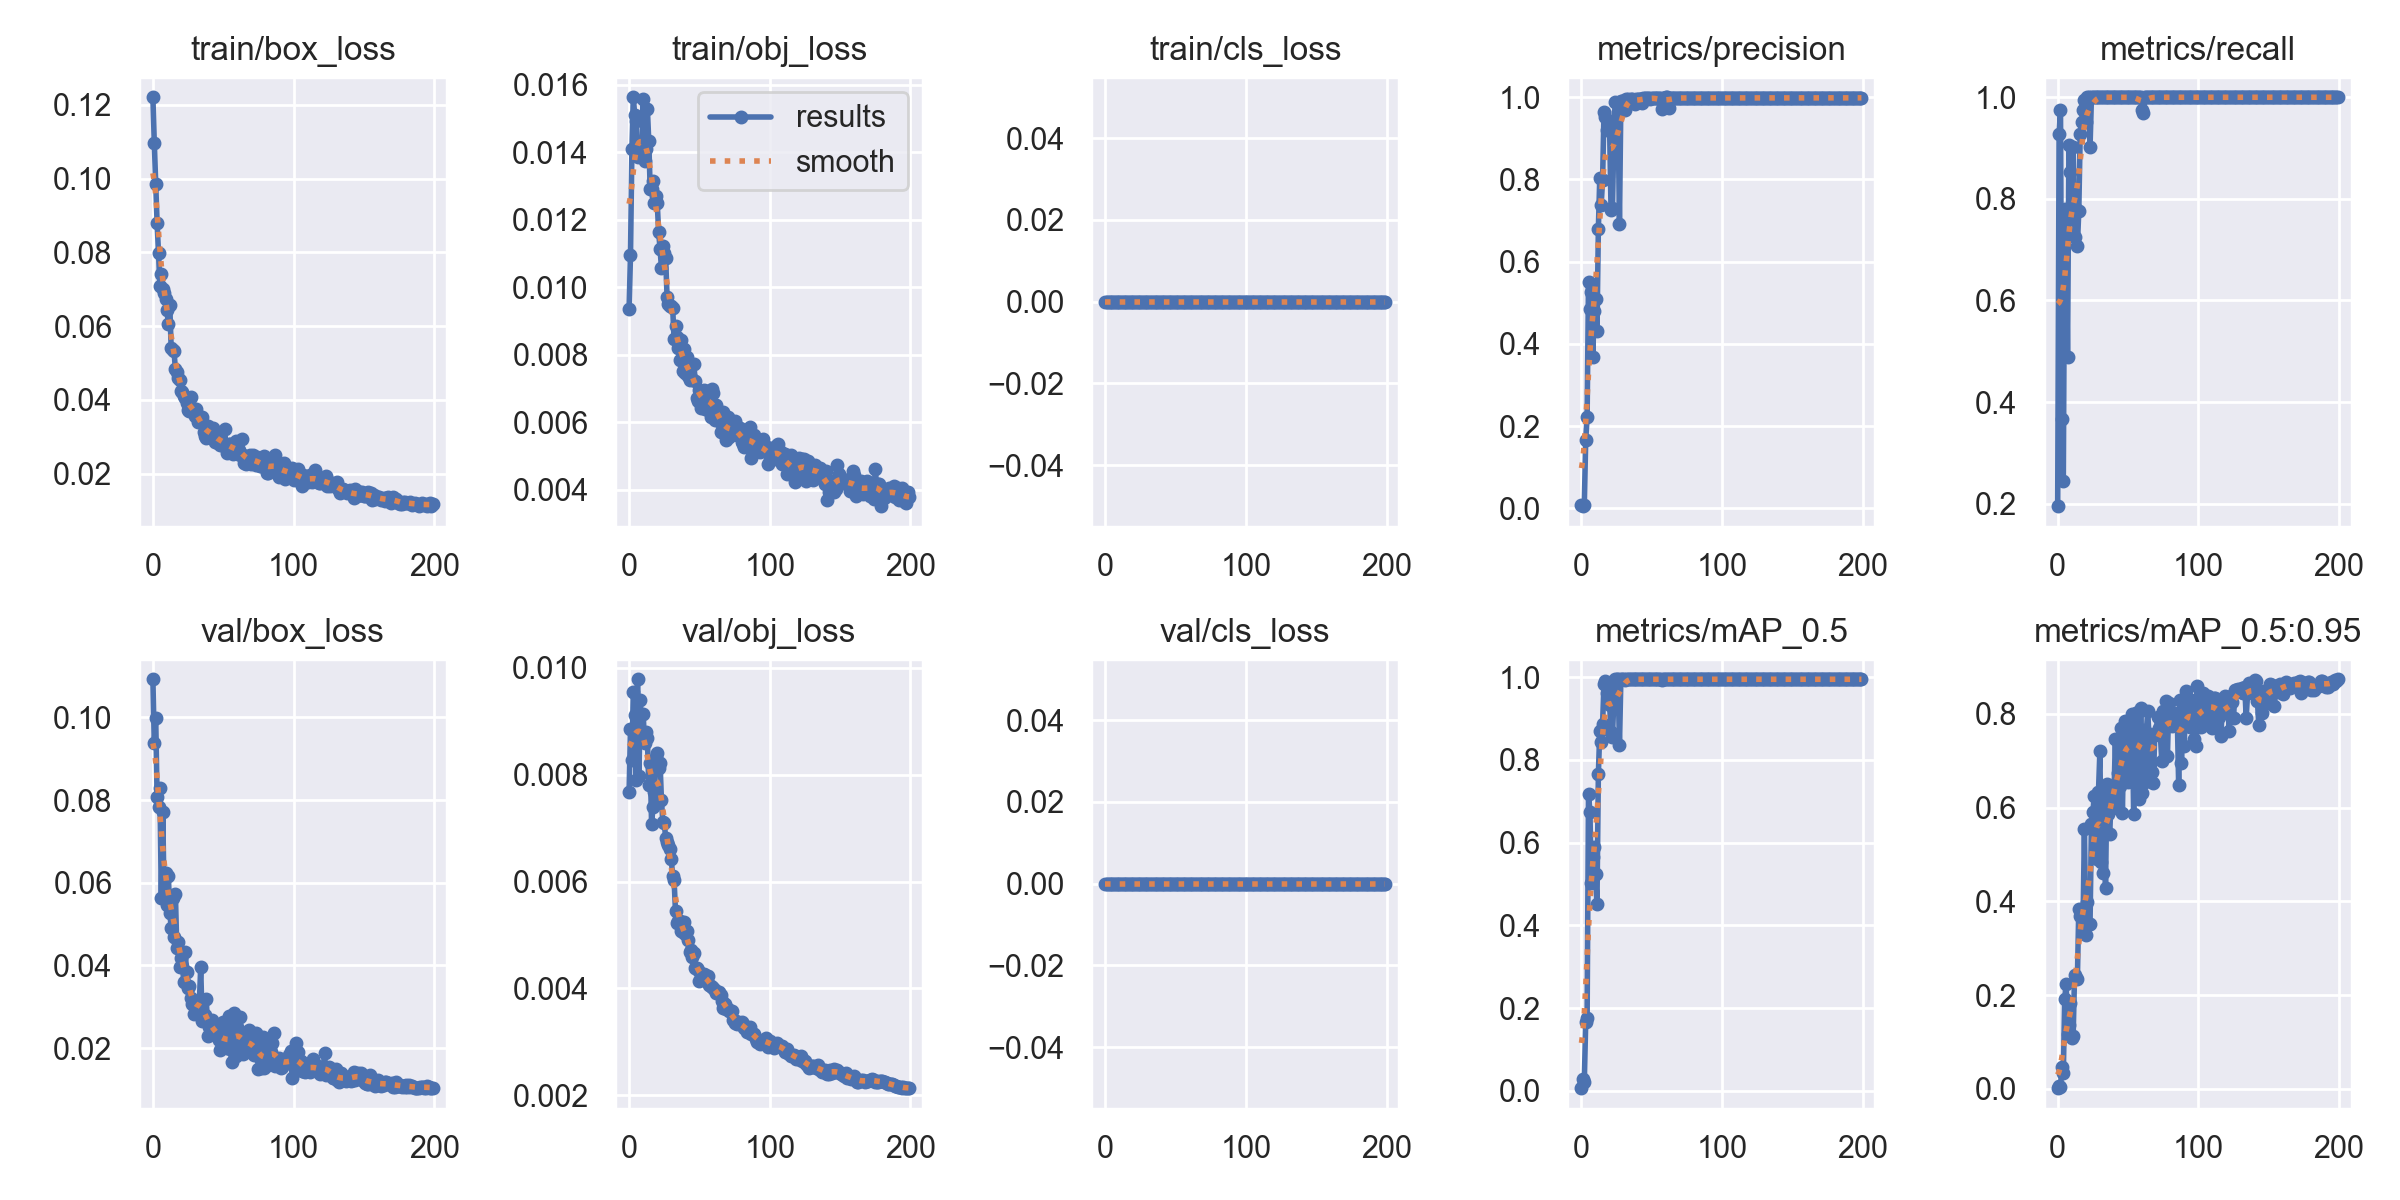

In [5]:
from utils.plots import plot_results  # plot results.txt as results.png
Image(filename='D:/Code/Robotik/DataTraining/content/yolov5/runs/train/yolov5s_results5/results.png', width=1000)